# e-commerce Exercise 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

In [6]:
customers = pd.read_csv('Sample')

In [8]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


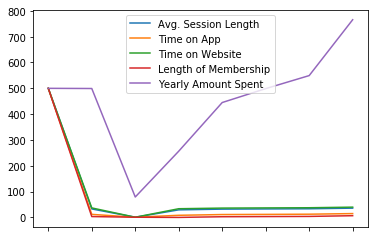

In [16]:
customers.describe().plot()

In [17]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [18]:
customers[['Time on Website','Yearly Amount Spent']].corr()

,Time on Website,Yearly Amount Spent
Time on Website,1.000000,-0.002641
Yearly Amount Spent,-0.002641,1.000000


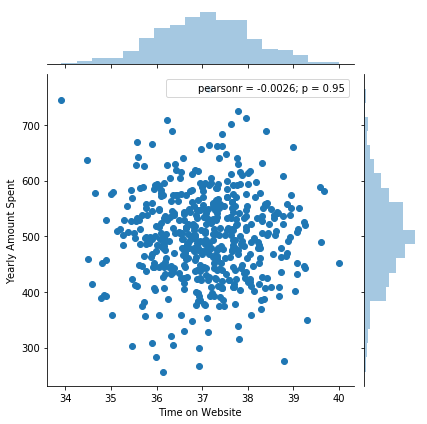

In [22]:
sns.jointplot('Time on Website','Yearly Amount Spent',customers)

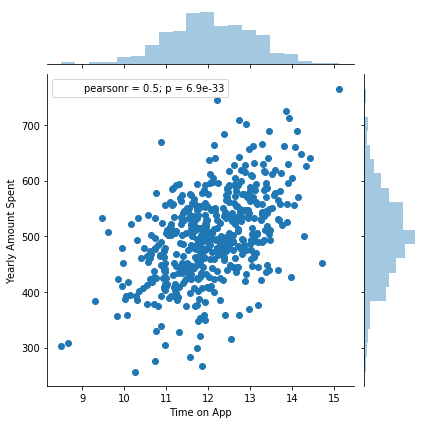

In [23]:
sns.jointplot('Time on App','Yearly Amount Spent',customers)

In [24]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

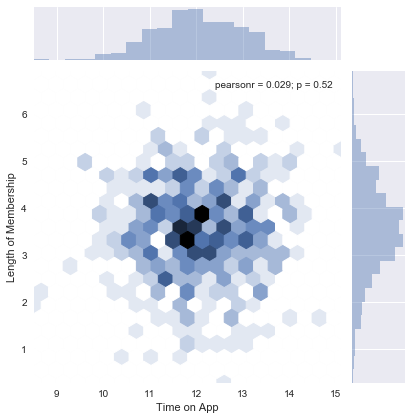

In [61]:
sns.set()
sns.jointplot('Time on App','Length of Membership',customers,kind='hex')

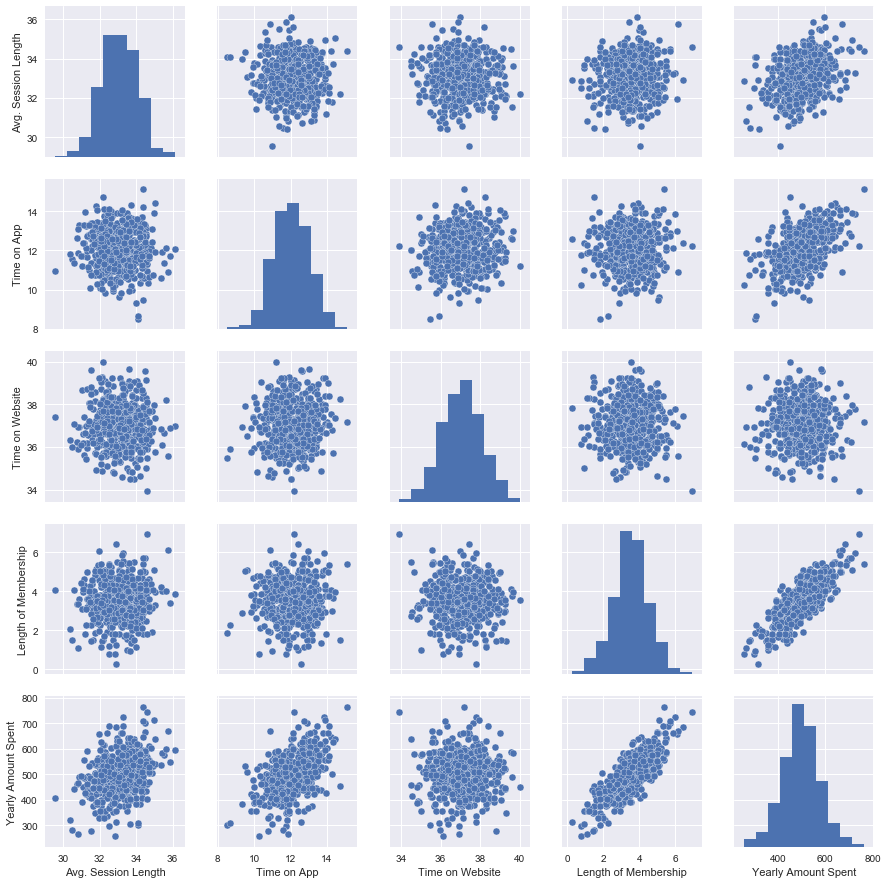

In [55]:
sns.pairplot(customers)

###### Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

Ans: Length of Member ship has linear relation with Yearly Amount Spent

In [37]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [38]:
customers.head(1)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054


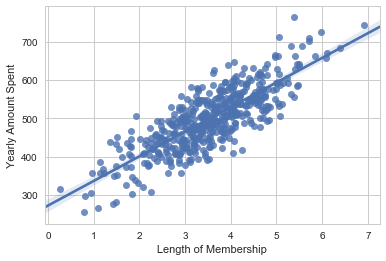

In [60]:
sns.set_style("whitegrid", {'axes.grid' : True})
sns.regplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

###### Setting grid SNS

In [96]:
sns.set_style("whitegrid", {'axes.grid' : True})

## Or

In [63]:
sns.set()

#####  Removing grid sns

In [64]:
sns.set_style("whitegrid", {'axes.grid' : False})

In [65]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [66]:
customers.head(1)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054


In [72]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [73]:
y=customers['Yearly Amount Spent']

In [74]:
from sklearn.cross_validation import train_test_split

In [ ]:
train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lm = LinearRegression()

In [78]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
lm.coef_

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

In [80]:
print(lm.intercept_)

-1047.93278225


In [81]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

### Note down the pbservations below:

In [82]:
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


###### Keeping other fields constant. A unit increase in avg session len is associated with around 26 dollar more expense

##### A unit increase in Time on app is associated with 38 dollars spent/year

##### Similarly, for a unit time on website associates 19 cents in spent/year

##### & a unit increase in membership len is found the strongest of all and leads to increase of 61 dollars spent/year

#### Do you think the company should focus more on their mobile app or on their website???

###### There are two ways to think about it:
###### 1> Looking at the coefficients, we could develop the website to catch-up to the mobile app. i.e. The website needs more effort according to the coefficient. So, the focus must be on increasing work towards the website...

###### 2> Should develop app more, since that is working much better.

###### Note: These decisions depends upon a number of factors going on at this particular company or wherever this data is actually coming from. Need to develop a relationship between length of membership & time on app or so on... before deriving a conclusion... 

###### Not forget to mention the benefits of each of the step as there are cost associated with each of the decision.Report & show this information in display in an informative manner. But before this, we need more info on cost of the decision to actually choose a correct focus...

In [84]:
y_test.head(1)

18    452.315675
Name: Yearly Amount Spent, dtype: float64

In [86]:
predictions[0]

456.44186104209962

Text(0,0.5,'Predicted Values')

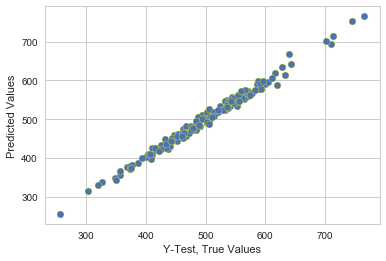

In [104]:
plt.scatter(y_test,predictions,edgecolor='yellow')
plt.xlabel('Y-Test, True Values')
plt.ylabel('Predicted Values')

In [89]:
residual = y_test - predictions

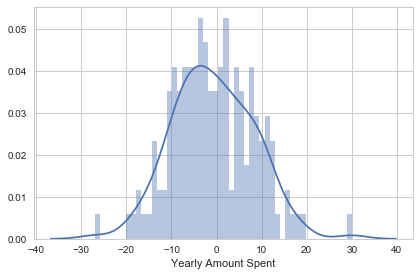

In [106]:
sns.distplot(residual,bins=50)
plt.tight_layout()

In [100]:
from sklearn import metrics

In [92]:
metrics.mean_absolute_error(y_test,predictions)

7.2281486534308197

In [93]:
metrics.mean_squared_error(y_test,predictions)

79.813051650974188

In [94]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

8.9338150669786192

##### Explained variance score calculation :

In [102]:
metrics.explained_variance_score(y_test,predictions)

0.98907712318896068

In [105]:
#************************************************************************#